In [3]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import sqlite3
import datetime

Credit to Stockanalysis.com for providing this public data to us

In [4]:
page  = requests.get("https://stockanalysis.com/list/biggest-companies/")
soup = BeautifulSoup(page.content, 'html.parser')
stocks = soup.find(class_='svelte-1tv1ofl')
names = stocks.find_all(class_='slw svelte-1tv1ofl')
symbols = stocks.find_all(class_='sym svelte-1tv1ofl')
prices = stocks.find_all(class_="svelte-1tv1ofl")

In [5]:
stock_names = []
for stock in names:
    stock_names.append(stock.get_text())
stock_symbols = []
for stock in symbols:
    stock_symbols.append(stock.get_text())
count = 0
count2 = 0
stock_prices = []
for stock in prices:
    if count >= 13:
        stock_prices.append(stock.get_text())
    count += 1

stock_prices2 = []
for stock in stock_prices:
    if count2 == 4:
        stock_prices2.append(stock)
    count2 += 1
    if count2 > 7:
        count2 = 0
count3 = 0
market_cap = []
for stock in stock_prices:
    if count3 == 3:
        market_cap.append(stock)
    count3 += 1
    if count3 > 7:
        count3 = 0
count4 = 0
percent_change = []
for stock in stock_prices:
    if count4 == 5:
        percent_change.append(stock)
    count4 += 1
    if count4 > 7:
        count4 = 0
count5 = 0
revenue = []
for stock in stock_prices:
    if count5 == 6:
        revenue.append(stock)
    count5 += 1
    if count5 > 7:
        count5 = 0

In [7]:
data = {
    'Name': stock_names[1 : 301],
    'Symbol': stock_symbols[1 : 301],
    'Price': stock_prices2[0 : 300],
    'Market Cap': market_cap[0 : 300],
    'Percent Change': percent_change[0 : 300],
    'Revenue': revenue[0 : 300],
}
df = pd.DataFrame(data)
df['Timestamp'] = datetime.datetime.utcnow()


In [10]:
df['Name'] = df['Name'].astype('string')
df['Symbol'] = df['Symbol'].astype('string')
df.replace(',','', regex=True, inplace=True)
df['Price'] = df['Price'].astype(float)
perc_change = df['Percent Change'].replace('%','', regex=True, inplace=True)

In [11]:
db = sqlite3.connect('../instance/dev.db')
df.to_sql('stocks', con=db, if_exists='replace', schema='stocks', index=False)

300

### Visualizing Data 

#### Top 10 Biggest Market Cap

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df.head(10)

,Name,Symbol,Price,Market Cap,Percent Change,Revenue,Timestamp
0,Apple Inc.,AAPL,178.94,2815.59B,-0.15,385.10B,2023-06-07 15:58:38.356706
1,Microsoft Corporation,MSFT,325.29,2418.76B,-2.51,207.59B,2023-06-07 15:58:38.356706
2,Alphabet Inc.,GOOGL,123.37,1570.32B,-3.10,284.61B,2023-06-07 15:58:38.356706
3,Amazon.com Inc.,AMZN,122.81,1260.90B,-3.00,524.90B,2023-06-07 15:58:38.356706
4,NVIDIA Corporation,NVDA,384.32,949.59B,-0.57,25.88B,2023-06-07 15:58:38.356706
5,Berkshire Hathaway Inc.,BRK.B,332.12,727.33B,-0.39,353.41B,2023-06-07 15:58:38.356706
6,Tesla Inc.,TSLA,225.73,715.89B,2.00,86.04B,2023-06-07 15:58:38.356706
7,Meta Platforms Inc.,META,268.61,688.72B,-0.93,117.35B,2023-06-07 15:58:38.356706
8,Taiwan Semiconductor Manufacturing Company Lim...,TSM,100.88,523.31B,1.06,74.80B,2023-06-07 15:58:38.356706
9,Visa Inc.,V,223.41,467.66B,-2.11,30.98B,2023-06-07 15:58:38.356706


In [14]:
markt_cap = [float(w.replace('B', '').replace(',', '')) for w in market_cap][0:10]
top_ten = df[['Name','Market Cap']][0:10]
top_ten['Name'][8] = "TSM Company Limited"
top_ten

,Name,Market Cap
0,Apple Inc.,2815.59B
1,Microsoft Corporation,2418.76B
2,Alphabet Inc.,1570.32B
3,Amazon.com Inc.,1260.90B
4,NVIDIA Corporation,949.59B
5,Berkshire Hathaway Inc.,727.33B
6,Tesla Inc.,715.89B
7,Meta Platforms Inc.,688.72B
8,TSM Company Limited,523.31B
9,Visa Inc.,467.66B


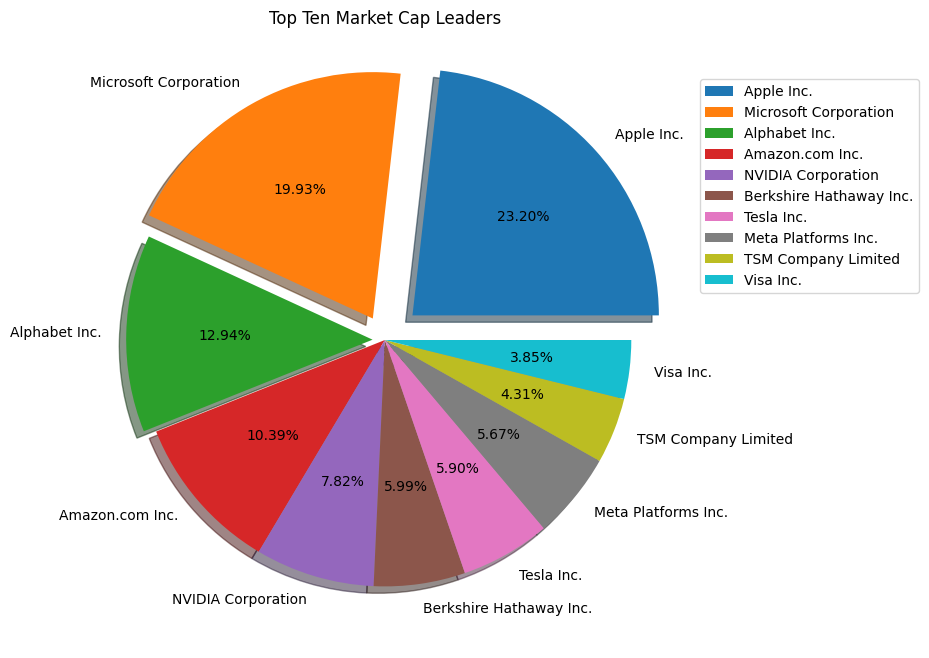

In [15]:
plt.figure(figsize=(10,8))
explode = (0.15,0.1,0.05,0,0,0,0,0,0,0)
plt.pie(
    markt_cap, labels= top_ten["Name"], 
    autopct='%.2f%%', 
    explode = explode, 
    shadow=True
)

plt.title("Top Ten Market Cap Leaders")
plt.legend(loc = 'center left',bbox_to_anchor=(1, 0.75))
plt.show()

#### Highest Price Change Increase

In [16]:
biggest_change = df.sort_values(by='Percent Change',ascending=False)[:5].reset_index()
biggest_change

,index,Name,Symbol,Price,Market Cap,Percent Change,Revenue,Timestamp
0,245,Microchip Technology Incorporated,MCHP,81.47,44.44B,5.12,8.44B,2023-06-07 15:58:38.356706
1,215,NXP Semiconductors N.V.,NXPI,188.90,49.11B,4.21,13.19B,2023-06-07 15:58:38.356706
2,282,ON Semiconductor Corporation,ON,91.88,39.70B,3.84,8.34B,2023-06-07 15:58:38.356706
3,199,Ford Motor Company,F,13.40,52.68B,3.63,165.06B,2023-06-07 15:58:38.356706
4,76,Caterpillar Inc.,CAT,234.87,121.18B,3.61,61.70B,2023-06-07 15:58:38.356706


In [17]:
perc_list = list(biggest_change['Percent Change'][:5])
[float(i) for i in perc_list]
old_price = []
for i in range(5):
    old_price.append(round((100*float(biggest_change["Price"][i]))/(float(perc_list[i])+100),2))    

old_price

[77.5, 181.27, 88.48, 12.93, 226.69]

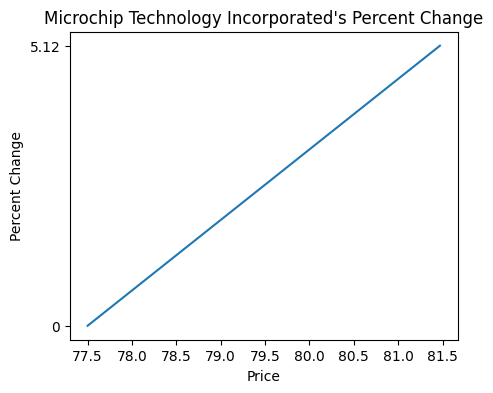

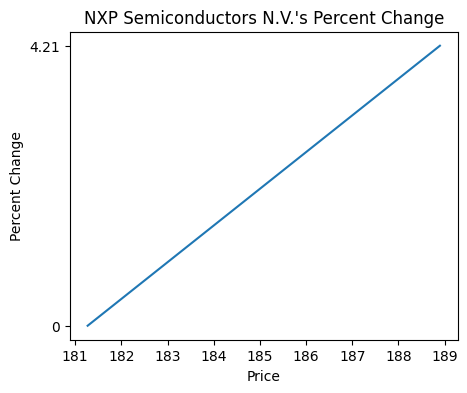

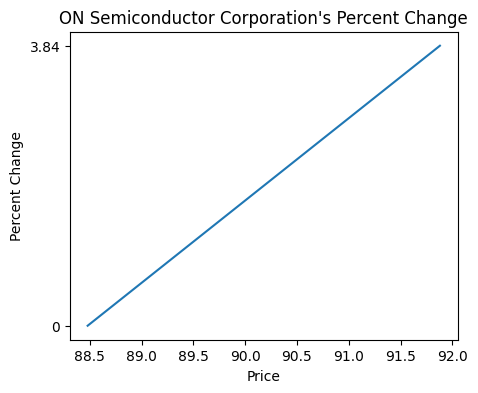

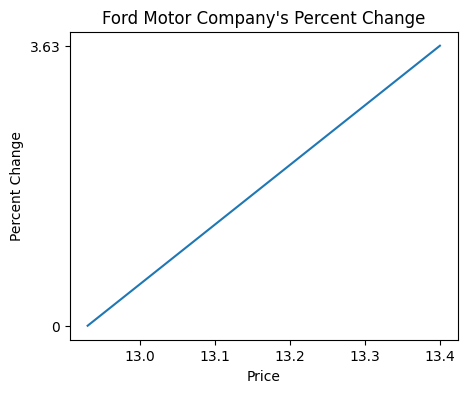

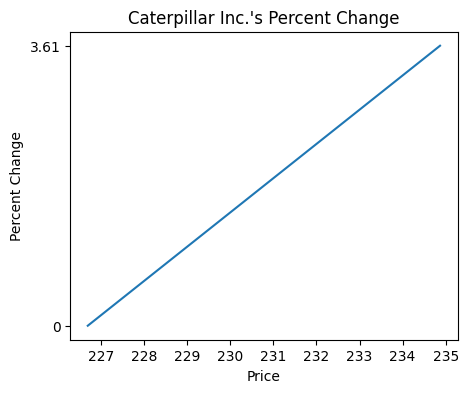

In [18]:
for i in range(5):
    y_vals = (0,biggest_change['Percent Change'][i])
    x_vals = (old_price[i],biggest_change['Price'][i])
    plt.figure(figsize=(5,4))
    plt.title(f"{biggest_change['Name'][i]}'s Percent Change")
    plt.xlabel("Price")
    plt.ylabel("Percent Change")
    plt.plot(x_vals,y_vals)
    plt.show()
    plt.close()

#### Highest Revenue and Market Cap

In [58]:
top_revs = df["Revenue"].str.rstrip("B")
top_rev = df[['Name','Revenue','Symbol','Market Cap']]
top_rev['Revenue'] = top_rev['Revenue'].str.rstrip("B").astype(float).sort_values(ascending=False,ignore_index=True)
top_rev['Market Cap'] = top_rev['Market Cap'].str.rstrip("B").astype(float).sort_values(ascending=False,ignore_index=True)
top_rev = top_rev[:10]
top_rev

,Name,Revenue,Symbol,Market Cap
0,Apple Inc.,622.02,AAPL,2815.59
1,Microsoft Corporation,524.90,MSFT,2418.76
2,Alphabet Inc.,409.74,GOOGL,1570.32
3,Amazon.com Inc.,386.20,AMZN,1260.90
4,NVIDIA Corporation,385.49,NVDA,949.59
5,Berkshire Hathaway Inc.,385.10,BRK.B,727.33
6,Tesla Inc.,353.41,TSLA,715.89
7,Meta Platforms Inc.,335.94,META,688.72
8,Taiwan Semiconductor Manufacturing Company Lim...,330.92,TSM,523.31
9,Visa Inc.,284.61,V,467.66


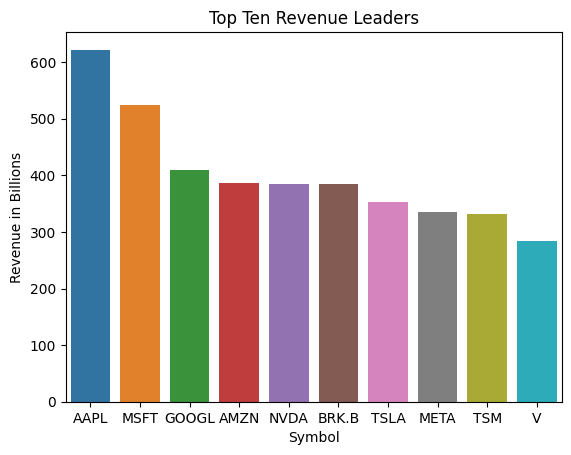

In [65]:
fig = sns.barplot(top_rev, x=top_rev['Symbol'], y=top_rev["Revenue"])
plt.title("Top Ten Revenue Leaders")
plt.ylabel("Revenue in Billions")
plt.show(fig)

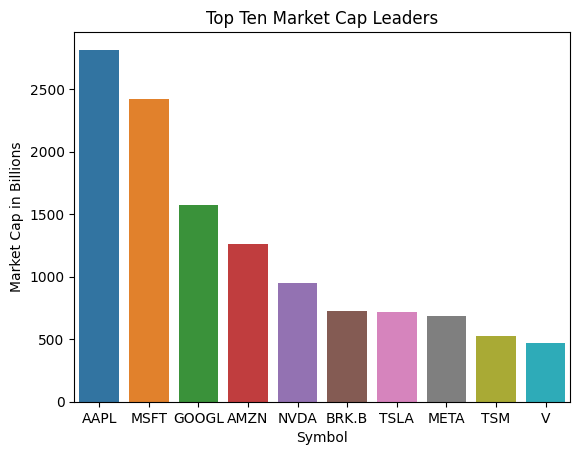

In [64]:
fig = sns.barplot(top_rev, x=top_rev['Symbol'], y=top_rev["Market Cap"])
plt.title("Top Ten Market Cap Leaders")
plt.ylabel("Market Cap in Billions")
plt.show(fig)

#### Highest Price per Stock

In [69]:
top_cost = df[['Name','Revenue','Symbol','Market Cap','Price']]
top_cost['Price'] = top_cost['Price'].replace(",'").astype(float).sort_values(ascending=False,ignore_index=True)
top_cost = top_cost[:10]
top_cost

,Name,Revenue,Symbol,Market Cap,Price
0,Apple Inc.,385.10B,AAPL,2815.59B,2641.26
1,Microsoft Corporation,207.59B,MSFT,2418.76B,2317.00
2,Alphabet Inc.,284.61B,GOOGL,1570.32B,2035.84
3,Amazon.com Inc.,524.90B,AMZN,1260.90B,1218.46
4,NVIDIA Corporation,25.88B,NVDA,949.59B,884.78
5,Berkshire Hathaway Inc.,353.41B,BRK.B,727.33B,803.78
6,Tesla Inc.,86.04B,TSLA,715.89B,802.35
7,Meta Platforms Inc.,117.35B,META,688.72B,744.17
8,Taiwan Semiconductor Manufacturing Company Lim...,74.80B,TSM,523.31B,731.43
9,Visa Inc.,30.98B,V,467.66B,715.59


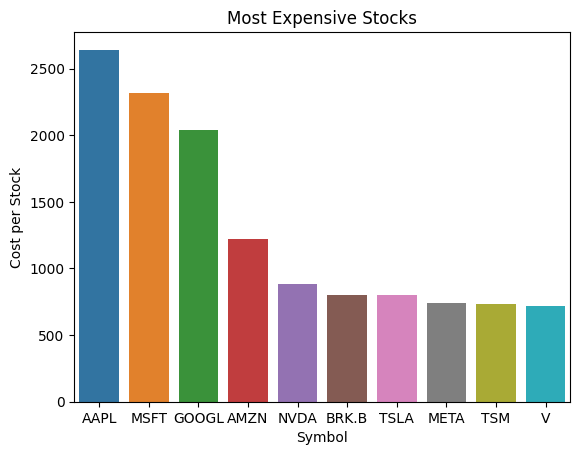

In [74]:
fig = sns.barplot(top_cost, x=top_cost['Symbol'], y=top_cost["Price"])
plt.title("Most Expensive Stocks")
plt.ylabel("Cost per Stock")
plt.show(fig)